# **Pertemuan 6: Sampling Distributions**
<hr>

### By: Andreas Syaloom Kurniawan (552751)

# Table of Contents
- [A. Sampling Distribution](#a)
- [B. Sample mean and sample variance](#a)
  - [B. 1 Chi-Square Distribution](#a.1)
  - [B. 2 Student t-distribution](#a.2)
  - [B. 3 F-distribution](#a.3)

![Img](https://raw.githubusercontent.com/ansyaku/Statistika3_UGM_ipynb/refs/heads/main/img/img61.jpg)

**Terminologi:**

* Suatu **sample statistic** adalah ukuran numerikal tertentu yang merangkum karakteristik dari  suatu sample.
* Contoh: `rata-rata`, `standar deviasi`, `range`, dll.
* Sample statistik akan menjadi estimator dari **population parameter**.
* >**Sampling distribution** adalah distribusi probabilitas dari sample statistic tertentu,
  >> yang diperoleh dari ukuran sample yang sama,
  >>> dan yang diambil dari populasi yang sama.

| Sample Statistic          | Population Parameter      |
|--------------------------|--------------------------|
| Sample mean, $\bar{x} $      | Population mean, $\mu $     |
| Sample variance, $s^2$      | Population variance, $ \sigma^2 $ |
| Sample standard deviation, $s$ | Population standard deviation, $ \sigma $ |

## Simulasi 1 : Analisis Distribusi Jumlah Kontainer per Kapal  

## **Latar Belakang**  
* Pelabuhan  Bremerhaven merupakan salah satu pelabuhan utama yang menangani pengiriman kontainer di Eropa. 
* Efisiensi operasional pelabuhan sangat bergantung pada **jumlah kontainer yang diterima per kapal** dalam setiap perjalanan.  
* Berdasarkan data historis, jumlah kontainer yang dikirim dalam satu pelayaran umumnya berada pada nilai berikut:  

> $3000, 4000, 5000, 8000, 10000, 14000, 20000$

* Manajemen pelabuhan ingin memahami **pola distribusi jumlah kontainer per kapal** untuk meningkatkan efisiensi bongkar muat, optimasi penggunaan crane, dan pengelolaan ruang penyimpanan.  
* Untuk itu, dilakukan analisis distribusi menggunakan **sampling acak** untuk mengetahui bagaimana rata-rata jumlah kontainer per kapal terdistribusi.

In [71]:
# 1. Menentukan populasi jumlah kontainer per kapal
populasi <- c(3000, 4000, 5000, 8000, 10000, 14000, 20000)

# 2. Menunjukkan berapa kombinasi sampel yang mungkin
sample_size<-choose(7, 4)
cat("Kombinasi Sample yang Terdiri dari 4 Kapal", sample_size, "Kombinasi \n \n")

# 3. Menghasilkan semua kombinasi mungkin dari ukuran sampel 3 tanpa pengembalian
kombinasi <- combn(populasi, 4)

# 4. Menghitung rata-rata dari setiap kombinasi sampel
mean_kombinasi <- colMeans(kombinasi)

# 5. Membuat dataframe untuk menampilkan hasil
df_kombinasi <- data.frame(
  Sampel_1 = kombinasi[1, ],
  Sampel_2 = kombinasi[2, ],
  Sampel_3 = kombinasi[3, ],
  Sampel_4 = kombinasi[4, ],
  Mean_Sampel = rowMeans(df_kombinasi[, 1:4])
)

print(head(format(df_kombinasi, justify = "left")))

Kombinasi Sample yang Terdiri dari 4 Kapal 35 Kombinasi 
 
  Sampel_1 Sampel_2 Sampel_3 Sampel_4 Mean_Sampel
1     3000     4000     5000     8000        5000
2     3000     4000     5000    10000        5500
3     3000     4000     5000    14000        6500
4     3000     4000     5000    20000        8000
5     3000     4000     8000    10000        6250
6     3000     4000     8000    14000        7250


In [72]:
# 5. Menghitung frekuensi kemunculan setiap mean unik
freq_mean <- table(df_kombinasi$Mean_Sampel)

# 6. Menghitung probabilitas kemunculan setiap mean unik
probabilitas_mean <- freq_mean / sum(freq_mean)

# Menyusun dataframe untuk frekuensi dan probabilitas
df_probabilitas <- data.frame(
  Mean_Sampel = as.numeric(names(probabilitas_mean)),  # Mengonversi indeks tabel menjadi angka
  Frekuensi = as.numeric(freq_mean),  # Frekuensi dari setiap mean unik
  Probabilitas = as.numeric(probabilitas_mean)  # Probabilitas kemunculan
)

# Menampilkan hasil
head(df_probabilitas)

,Mean_Sampel,Frekuensi,Probabilitas
,<dbl>,<dbl>,<dbl>
1,5000,1,0.02857143
2,5500,1,0.02857143
3,6250,1,0.02857143
4,6500,2,0.05714286
5,6750,1,0.02857143
6,7250,1,0.02857143


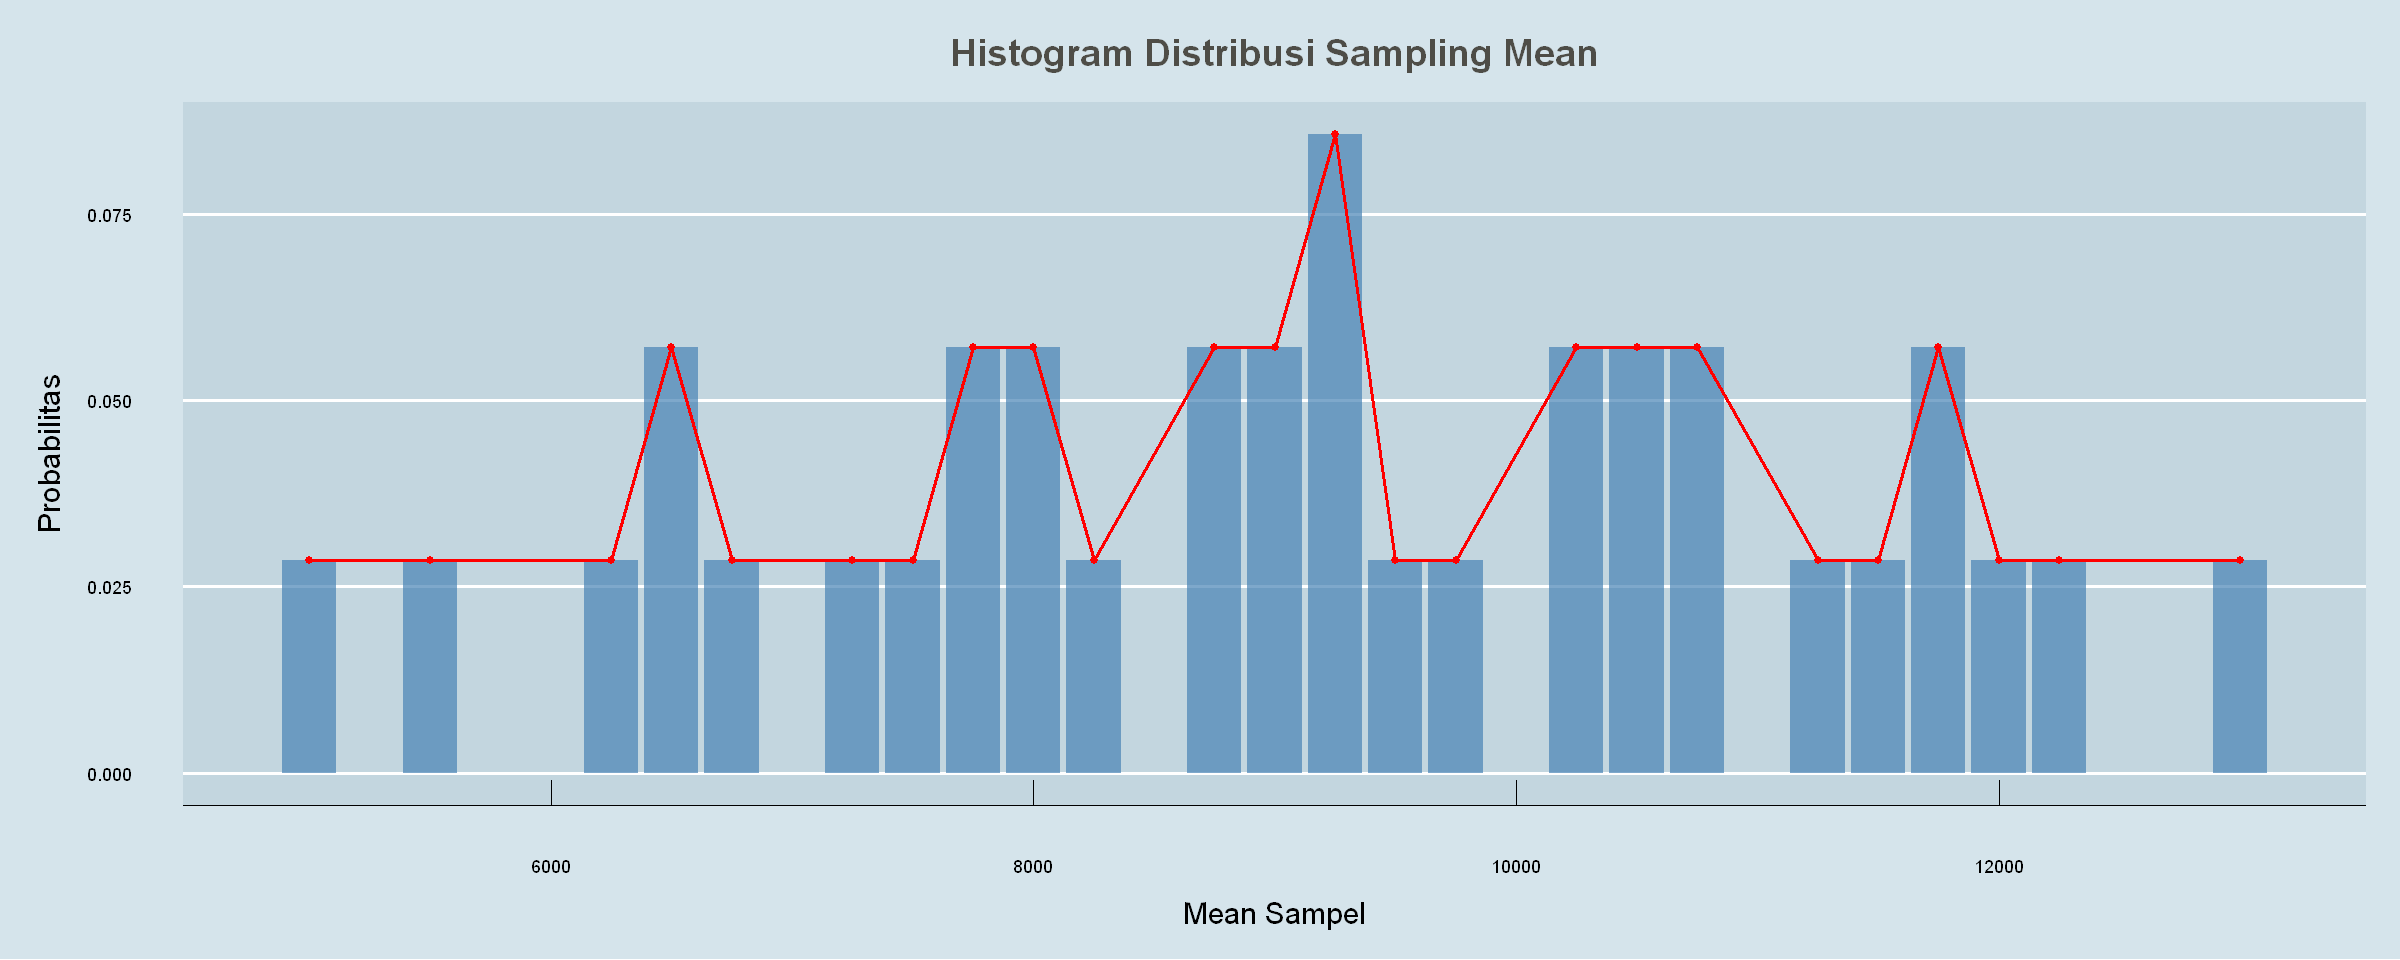

In [73]:
# 7. Membuat dataframe untuk plotting
library(ggplot2)
library(ggthemes)

# this is just to make the plots wider (extend to the end of laptop display) 
options(repr.plot.width=20, repr.plot.height=8) 

# 8. Membuat histogram distribusi sampling mean
ggplot(df_probabilitas, aes(x = Mean_Sampel, y = Probabilitas)) +
  geom_bar(stat = "identity", fill = "steelblue", alpha = 0.7) +  # Histogram
  geom_line(aes(y = Probabilitas), color = "red", size = 1) +  # Overlay garis distribusi
  geom_point(aes(y = Probabilitas), color = "red", size = 2) + # Titik-titik pada garis
  labs(title = "Histogram Distribusi Sampling Mean",
       x = "Mean Sampel",
       y = "Probabilitas") +
  theme_economist(base_size = 30, dkpanel=TRUE)+
  theme(
    legend.position = "none",  
    plot.title = element_text(size = 22, hjust = 0.5, color = "#4e4d47", 
                              margin = margin(b = 20)),  # Jarak bawah judul agar tidak menempel ke plot
    axis.title.x = element_text(size = 18, margin = margin(t = 15)),  # Jarak atas label X
    axis.title.y = element_text(size = 18, margin = margin(r = 15)),  # Jarak kanan label Y
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20)  # Beri padding di semua sisi
  )

**Theorem**  

Let $X_1, \dots, X_n$ be a random sample of size $n$ from a population with mean $\mu$ and variance $\sigma^2$. Then,  
$ E\left(\bar{X}\right) = \mu \quad \text{and} \quad \text{Var} \left(\bar{X}\right) = \frac{\sigma^2}{n}$

In [74]:
# 6. Menghitung Mean Populasi
mean_populasi <- mean(populasi)      # Mean Populasi

# 7. Menghitung Mean dan Varians dari Sampling Distribution
mean_sample <- sum(df_probabilitas$Mean_Sampel * df_probabilitas$Probabilitas)

# 8. Menampilkan hasil
cat("Mean Populasi:", mean_populasi, "\n")
cat("Mean dari Mean Sampel:", mean_sample, "\n")

Mean Populasi: 9142.857 
Mean dari Mean Sampel: 9142.857 


Mean Populasi: 9142.857 
Varians Populasi: 32122449 
Empirical Mean of Sample Means: 9133.5 
Empirical Variance of Sample Means: 3966387 


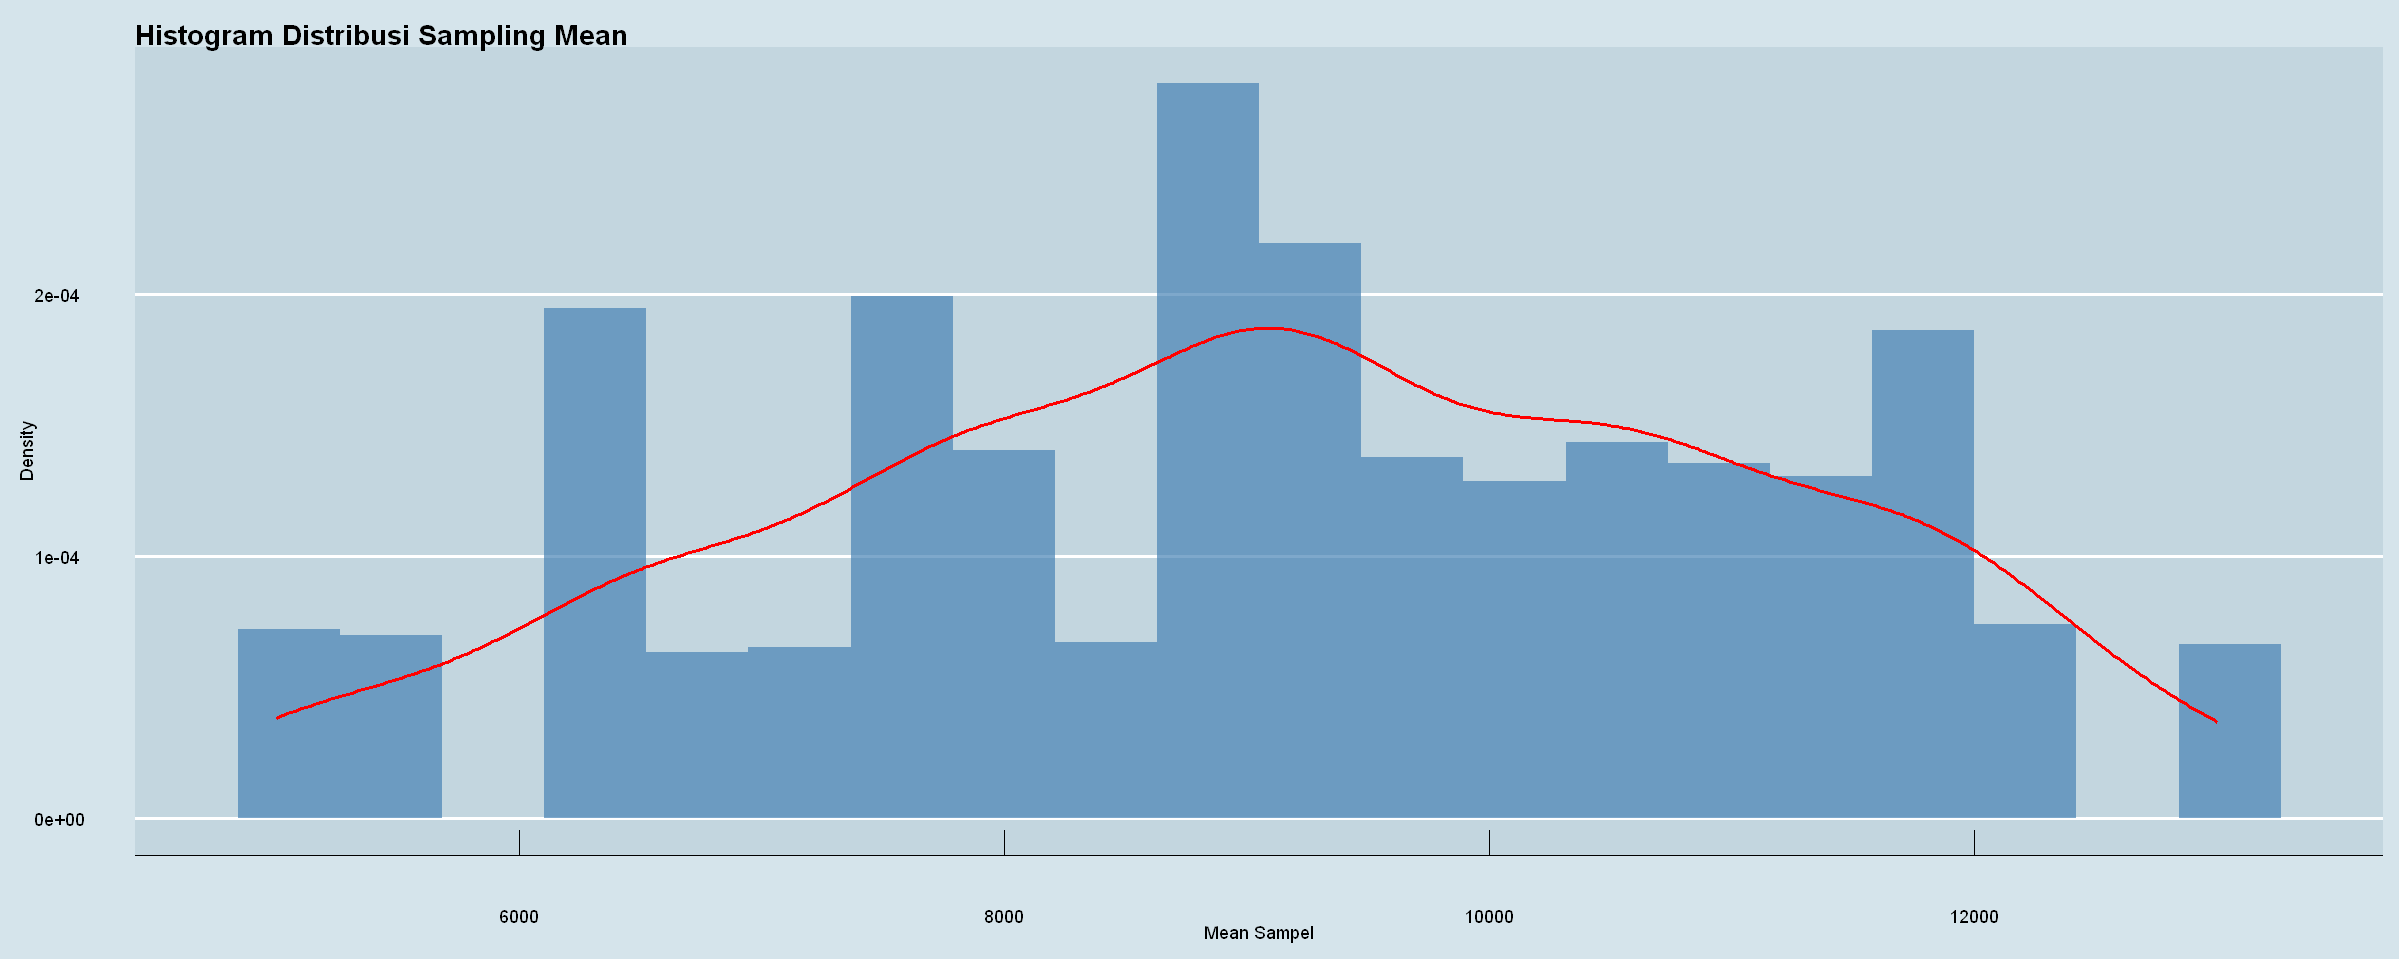

In [83]:
# 1. Menentukan populasi jumlah kontainer per kapal
populasi <- c(3000, 4000, 5000, 8000, 10000, 14000, 20000)

# 2. Parameter Eksperimen
sample_size <- 4     # Ukuran sampel
num_trials <- 10000   # Jumlah percobaan

# 3. Simulasi Sampling 1000 Kali
set.seed(123)  # Untuk hasil yang sama setiap kali dijalankan
mean_samples <- numeric(num_trials)  # Vektor untuk menyimpan hasil mean sampel

for (i in 1:num_trials) {
  sampel <- sample(populasi, sample_size, replace = FALSE)  # Sampling tanpa pengembalian
  mean_samples[i] <- mean(sampel)  # Hitung mean dari sampel
}

# 4. Menghitung Mean dan Varians Populasi
mean_populasi <- mean(populasi)
var_populasi <- sum((populasi - mean_populasi)^2) / length(populasi)

# 5. Menghitung Mean dan Varians dari Distribusi Sampling
mean_sample_empirical <- mean(mean_samples)  # Mean dari distribusi sampling
var_sample_empirical <- var(mean_samples)  # Varians dari distribusi sampling

# 7. Menampilkan Hasil
cat("Mean Populasi:", mean_populasi, "\n")
cat("Varians Populasi:", var_populasi, "\n")
cat("Empirical Mean of Sample Means:", mean_sample_empirical, "\n")
cat("Empirical Variance of Sample Means:", var_sample_empirical, "\n")

# 8. Plot Distribusi Sampling Mean
library(ggplot2)
ggplot(data.frame(mean_samples), aes(x = mean_samples)) +
  geom_histogram(aes(y = ..density..), bins = 20, fill = "steelblue", alpha = 0.7) +

  geom_density(color = "red", size = 1, adjust = 2) +  # adjust = 2 makes it smoother
labs(title = "Histogram Distribusi Sampling Mean",
       x = "Mean Sampel",
       y = "Density") +
  theme_economist(base_size = 30, dkpanel=TRUE)

## Simulasi 2: Distribusi Chi Square

## Latar Belakang

* Sebuah lembaga ekonomi ingin mengevaluasi apakah varians inflasi tahunan selama **10 tahun terakhir** sesuai dengan asumsi **0.5%²** (atau 0.0025%). 
* Data tingkat inflasi tahunan (dalam persen) tercatat sebagai berikut:

| Tahun  | 2014 | 2015 | 2016 | 2017 | 2018 | 2019 | 2020 | 2021 | 2022 | 2023 |
|--------|------|------|------|------|------|------|------|------|------|------|
| Inflasi (%) | 2.1  | 2.5  | 2.3  | 2.7  | 2.4  | 2.2  | 2.2  | 2.6  | 2.3  | 2.8  |

## Pertanyaan:

1. **Hitung varians sampel**  $S^2$.
2. **Lakukan uji hipotesis: (**Gunakan distribusi Chi-Square** dengan $\alpha = 0.05$.)**
   - **H₀**: $\sigma^2 = 0.5$ (variabilitas inflasi stabil)
   - **H₁**: $\sigma^2 > 0.5$ (inflasi semakin tidak stabil)


In [75]:
# Data inflasi tahunan
inflasi <- c(2.1, 2.5, 2.3, 2.7, 2.4, 2.2, 2.2, 2.6, 2.3, 2.8)

# Hitung varians sampel
sample_variance <- var(inflasi)

# Tampilkan hasil
cat("Varians Sample", round(sample_variance,3))

Varians Sample 0.054

In [71]:
# Parameter uji
sigma0_sq <- 0.05  # Varians hipotesis nol
n <- length(inflasi)  # Jumlah sampel
df <- n - 1  # Derajat kebebasan

# Hitung statistik uji Chi-Square
chi_sq <- (df * sample_variance) / sigma0_sq

# Nilai kritis Chi-Square untuk alpha = 0.05
chi_crit <- qchisq(0.95, df)

# Keputusan uji
if (chi_sq > chi_crit) {
  keputusan <- "Tolak H0: Varians lebih besar dari 0.05, inflasi tidak stabil."
} else {
  keputusan <- "Gagal tolak H0: Tidak cukup bukti bahwa inflasi tidak stabil."
}

# Output hasil
list(Sample_Variance = round(sample_variance,3), 
     Chi_Square_Stat = chi_sq, 
     Chi_Square_Critical = round(chi_crit, 3), 
     Decision = keputusan)

$Sample_Variance
[1] 0.054

$Chi_Square_Stat
[1] 9.78

$Chi_Square_Critical
[1] 16.919

$Decision
[1] "Gagal tolak H0: Tidak cukup bukti bahwa inflasi tidak stabil."

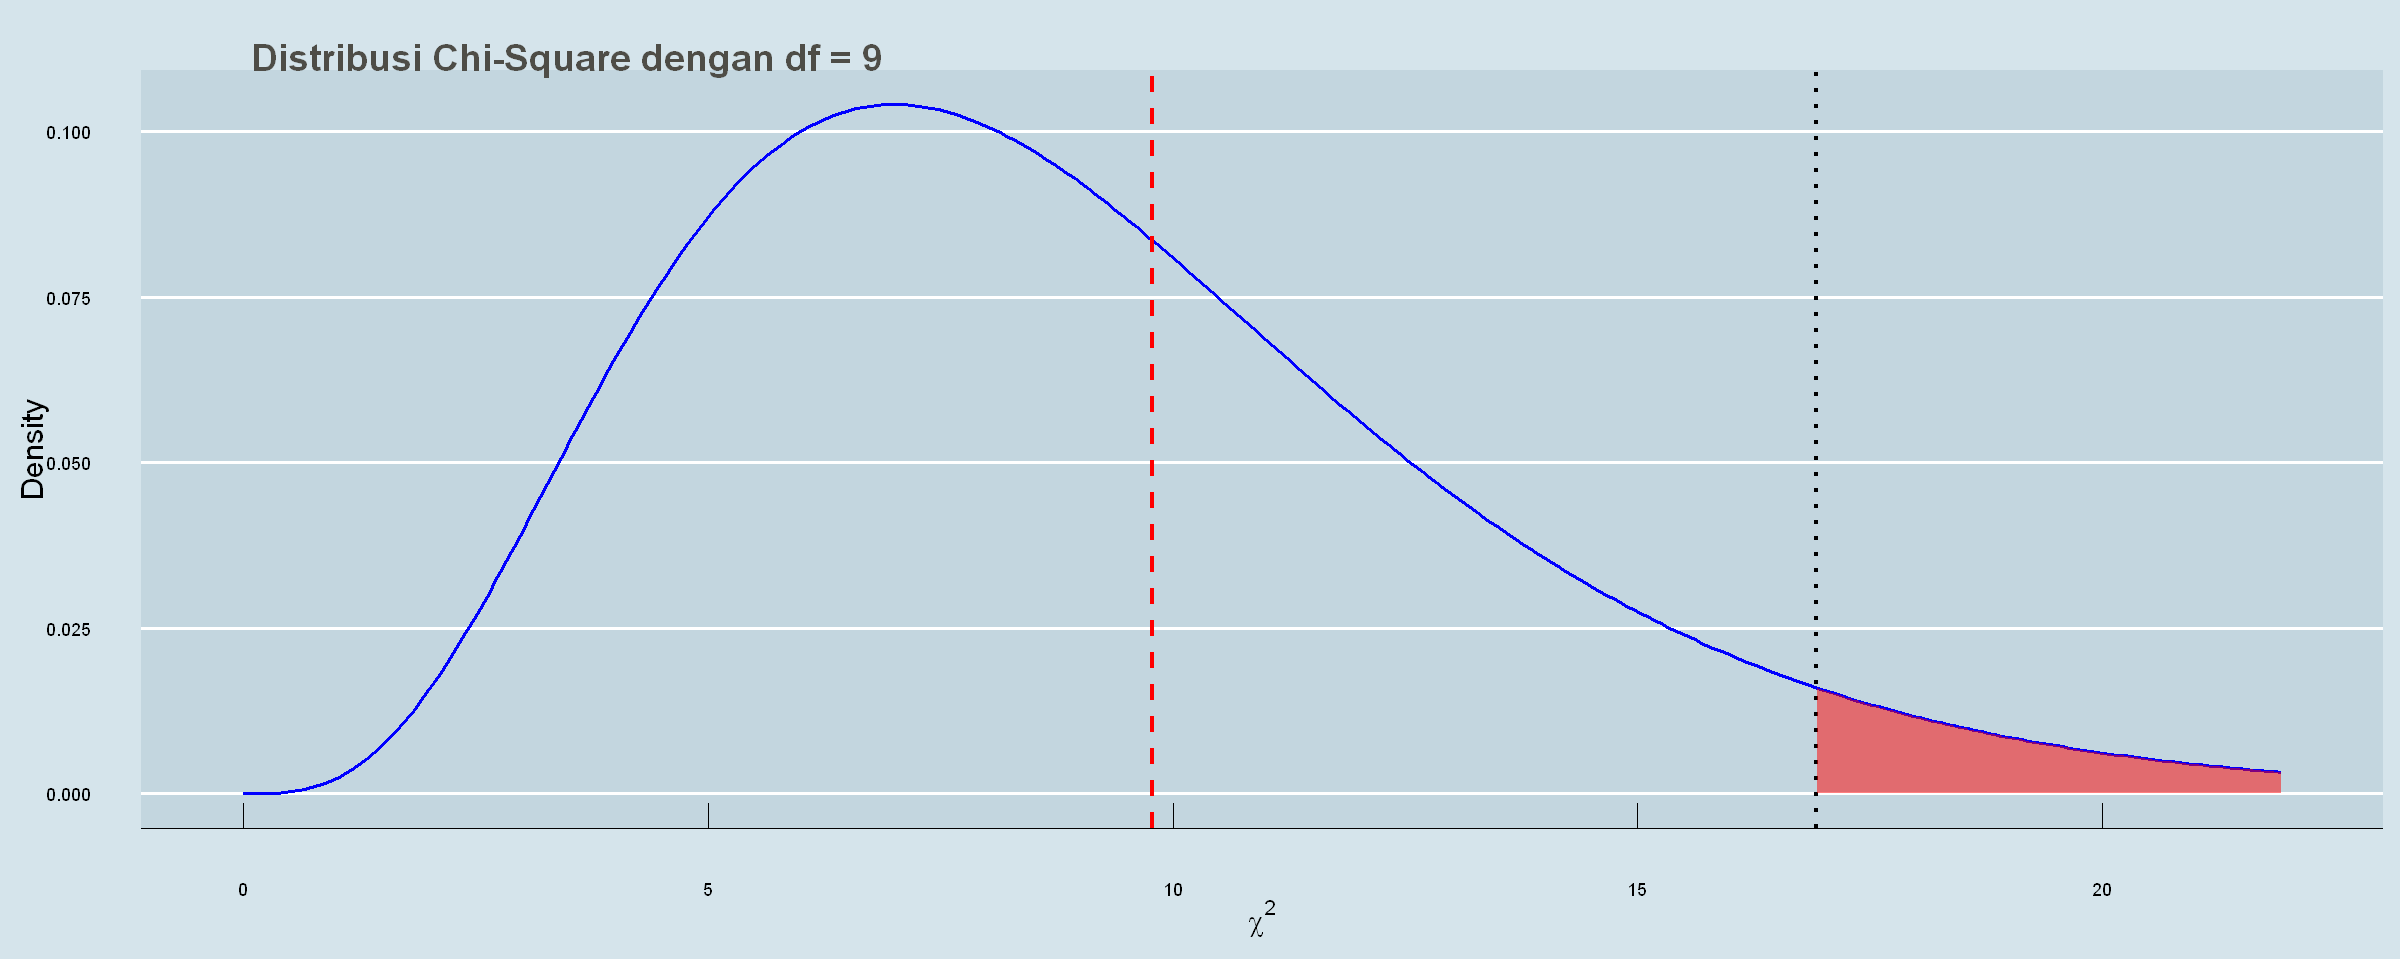

In [73]:
# Buat data untuk plot distribusi Chi-Square
x_vals <- seq(0, chi_crit + 5, length.out = 300)
y_vals <- dchisq(x_vals, df)

# Plot distribusi dengan ggplot2
df_plot <- data.frame(x = x_vals, y = y_vals)

ggplot(df_plot, aes(x, y)) +
  geom_line(color = "blue", size = 1) +
  geom_vline(xintercept = chi_sq, color = "red", linetype = "dashed", size = 1.2) +
  geom_vline(xintercept = chi_crit, color = "black", linetype = "dotted", size = 1.2) +
  geom_area(data = subset(df_plot, x >= chi_crit), aes(x, y), fill = "red", alpha = 0.5) +
  labs(
    title = "Distribusi Chi-Square dengan df = 9",
    x = expression(chi^2),
    y = "Density"
  ) +
   theme_economist(base_size = 30, dkpanel=TRUE)+
   theme(legend.position = "none",  
        plot.title = element_text(size= 22, hjust=0.01, color = "#4e4d47", margin = margin(b = -0.1, t = 0.4, l = 2, unit = "cm")),
        axis.title.x = element_text(size = 18), # Perbesar teks sumbu X
        axis.title.y = element_text(size = 18)) # Perbesar teks sumbu Y)  

## Simulasi 3: Distribusi t-Student dan F

# Latar Belakang

Pemerintah meluncurkan program subsidi untuk obat generik guna menekan biaya pengobatan masyarakat. Sebelum kebijakan ini diterapkan, rata-rata pengeluaran masyarakat untuk obat adalah **Rp750.000 per bulan**.

Setelah kebijakan subsidi diterapkan selama 6 bulan, dilakukan survei terhadap **30 pasien** yang membeli obat generik, dan hasilnya menunjukkan rata-rata pengeluaran sebesar **Rp680.000 per bulan** dengan standar deviasi **Rp120.000**.

## **Pertanyaan:**
1. Formulasikan **hipotesis nol** dan **hipotesis alternatif** untuk menguji apakah kebijakan subsidi menurunkan pengeluaran obat secara signifikan.
2. Gunakan **uji-t satu sampel** dengan tingkat signifikansi **$\alpha = 0.05$**.
3. Hitung **nilai t-hitung** dan bandingkan dengan **t-kritis**.


In [64]:
# Definisi parameter
n <- 30  # Jumlah sampel
mu_0 <- 750000  # Rata-rata sebelum kebijakan
x_bar <- 680000  # Rata-rata setelah kebijakan
s <- 120000  # Standar deviasi sampel
alpha <- 0.05  # Tingkat signifikansi

# Hitung t-hitung
t_hitung <- (x_bar - mu_0) / (s / sqrt(n))

# Hitung t-kritis (uji satu arah, lower tail)
t_kritis <- qt(alpha, df = n - 1)

# Output hasil uji
cat("Nilai t-hitung:", t_hitung, "\n")
cat("Nilai t-kritis:", t_kritis, "\n")

Nilai t-hitung: -3.195048 
Nilai t-kritis: -1.699127 


In [65]:

# Keputusan uji
if (t_hitung < t_kritis) {
  cat("Keputusan: Tolak H0, kebijakan subsidi menurunkan pengeluaran secara signifikan.\n")
} else {
  cat("Keputusan: Gagal tolak H0, tidak ada cukup bukti bahwa kebijakan menurunkan pengeluaran.\n")
}

Keputusan: Tolak H0, kebijakan subsidi menurunkan pengeluaran secara signifikan.


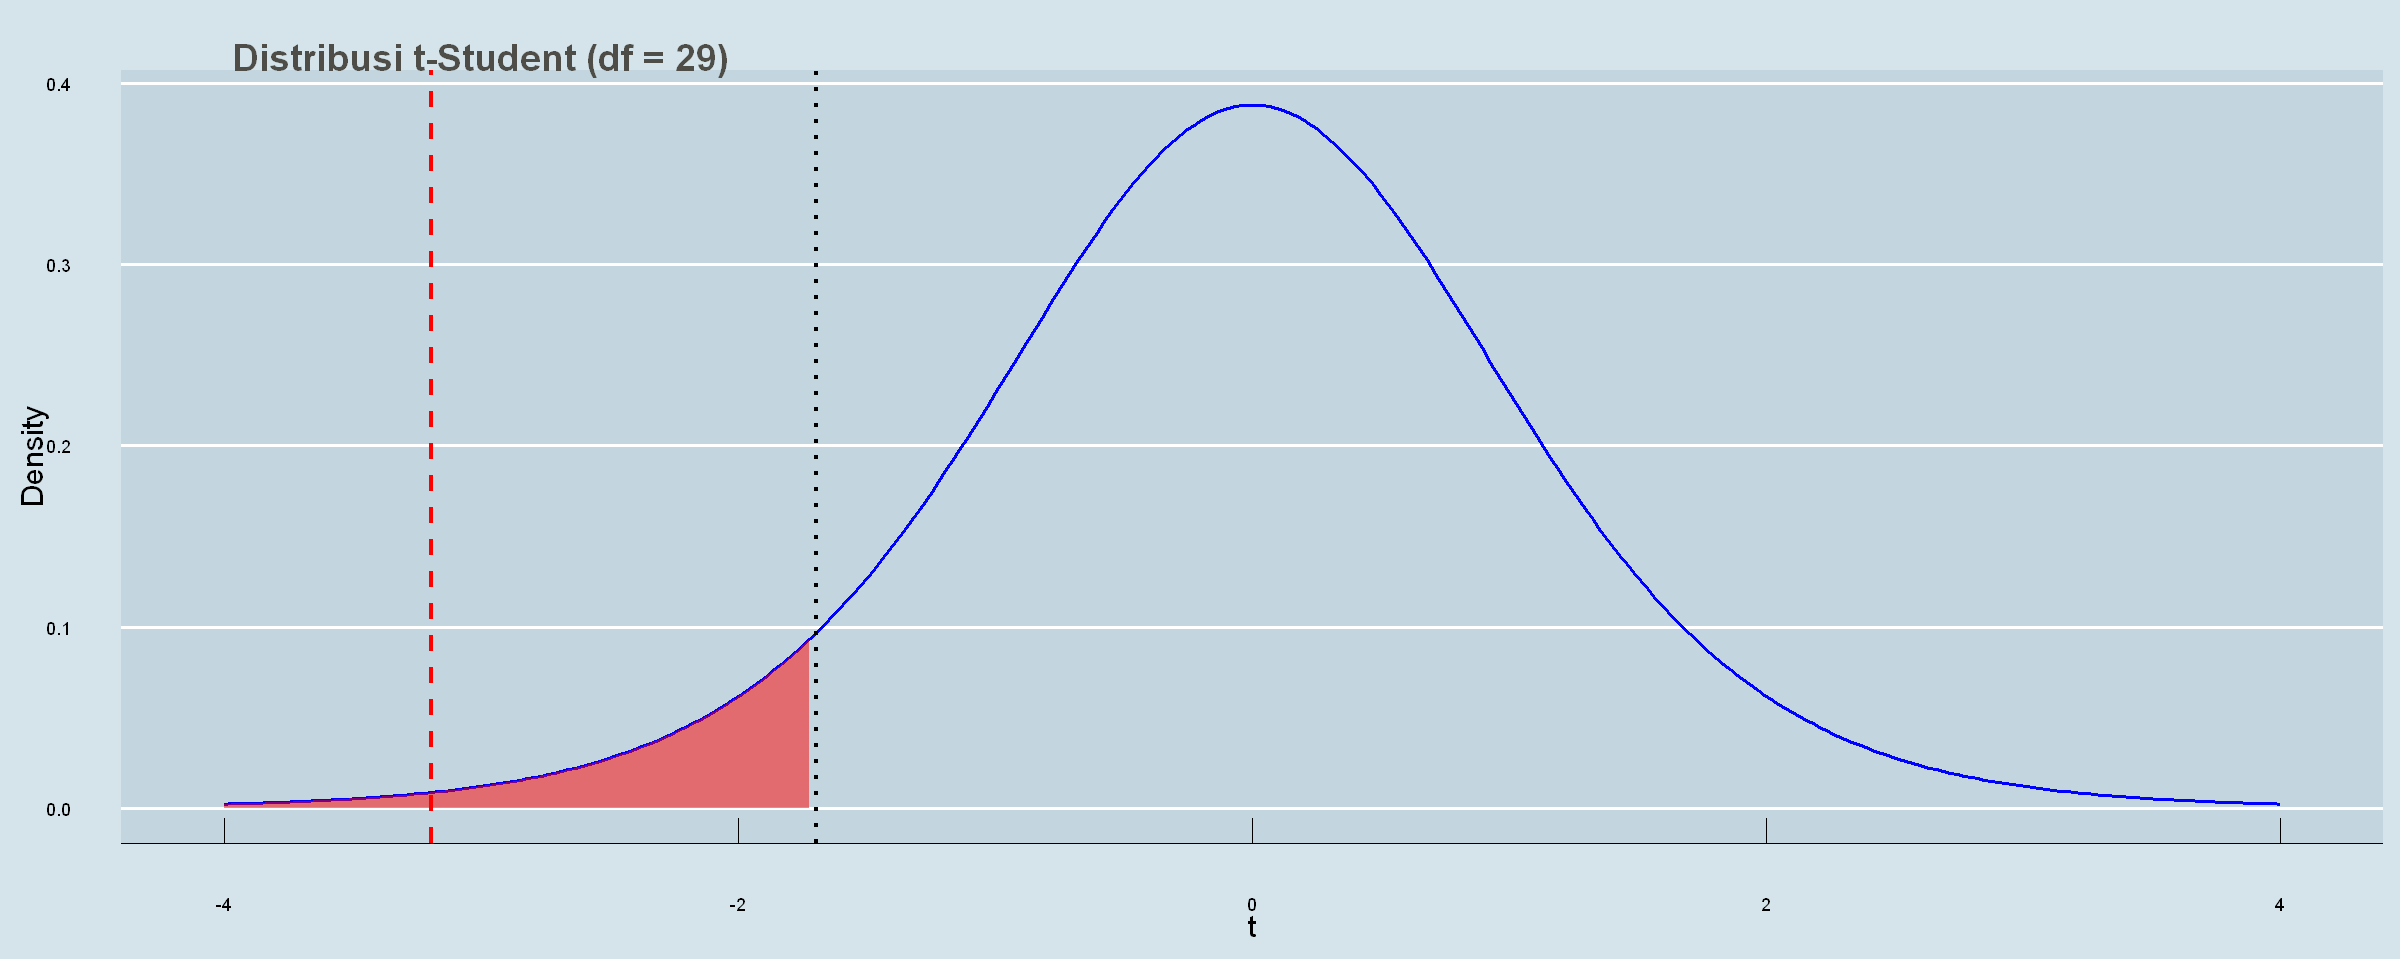

In [74]:
# Visualisasi distribusi t-Student
library(ggplot2)

# Data untuk plot distribusi t
df <- n - 1
x_vals <- seq(-4, 4, length.out = 300)
y_vals <- dt(x_vals, df)

df_plot <- data.frame(x = x_vals, y = y_vals)

ggplot(df_plot, aes(x, y)) +
  geom_line(color = "blue", size = 1) +
  geom_vline(xintercept = t_hitung, color = "red", linetype = "dashed", size = 1.2) +
  geom_vline(xintercept = t_kritis, color = "black", linetype = "dotted", size = 1.2) +
  geom_area(data = subset(df_plot, x <= t_kritis), aes(x, y), fill = "red", alpha = 0.5) +
  labs(
    title = "Distribusi t-Student (df = 29)",
    x = "t",
    y = "Density"
  ) +
  theme_economist(base_size = 30, dkpanel=TRUE)+ theme(legend.position = "none",  
        plot.title = element_text(size= 22, hjust=0.01, color = "#4e4d47", margin = margin(b = -0.1, t = 0.4, l = 2, unit = "cm")),
        axis.title.x = element_text(size = 18), # Perbesar teks sumbu X
        axis.title.y = element_text(size = 18)) # Perbesar teks sumbu Y)  


## Simulasi 3: Distribusi F
## Latar Belakang

Parameter Uji F: Variabilitas Pengeluaran Pasien Sebelum dan Sesudah Subsidi

| Parameter                  | Sebelum Subsidi  | Setelah Subsidi |
|----------------------------|-----------------|----------------|
| Jumlah Sampel $n$    | 30              | 30             |
| Standar Deviasi $s$  | 150,000         | 120,000        |
| Varians $s^2$        | $150,000^2$ | $120,000^2$ |
| Tingkat Signifikansi $\alpha$ | 0.05 | 0.05 |

In [85]:
# Definisi parameter
n1 <- 30  # Jumlah sampel sebelum subsidi
s1 <- 150000  # Standar deviasi sebelum subsidi

n2 <- 30  # Jumlah sampel setelah subsidi
s2 <- 120000  # Standar deviasi setelah subsidi

alpha <- 0.05  # Tingkat signifikansi

# Hitung F-hitung
F_hitung <- (s1^2) / (s2^2)
cat("F Hitung:", F_hitung, "\n")

# Hitung F-kritis (dua sisi, karena kita tidak tahu apakah varians naik atau turun)
df1 <- n1 - 1
df2 <- n2 - 1
F_kritis_bawah <- qf(alpha / 2, df1, df2, lower.tail = TRUE)
F_kritis_atas <- qf(1 - alpha / 2, df1, df2, lower.tail = TRUE)
cat("F Kritis Bawah:", F_kritis_bawah, "\n")
cat("F Kritis Atas:", F_kritis_atas)

F Hitung: 1.5625 
F Kritis Bawah: 0.4759648 
F Kritis Atas: 2.100996

In [86]:
# Keputusan uji
if (F_hitung < F_kritis_bawah | F_hitung > F_kritis_atas) {
  cat("Keputusan: Tolak H0, ada perbedaan signifikan dalam varians pengeluaran pasien.\n")
} else {
  cat("Keputusan: Gagal tolak H0, tidak ada cukup bukti bahwa subsidi mempengaruhi varians pengeluaran pasien.\n")
}

Keputusan: Gagal tolak H0, tidak ada cukup bukti bahwa subsidi mempengaruhi varians pengeluaran pasien.


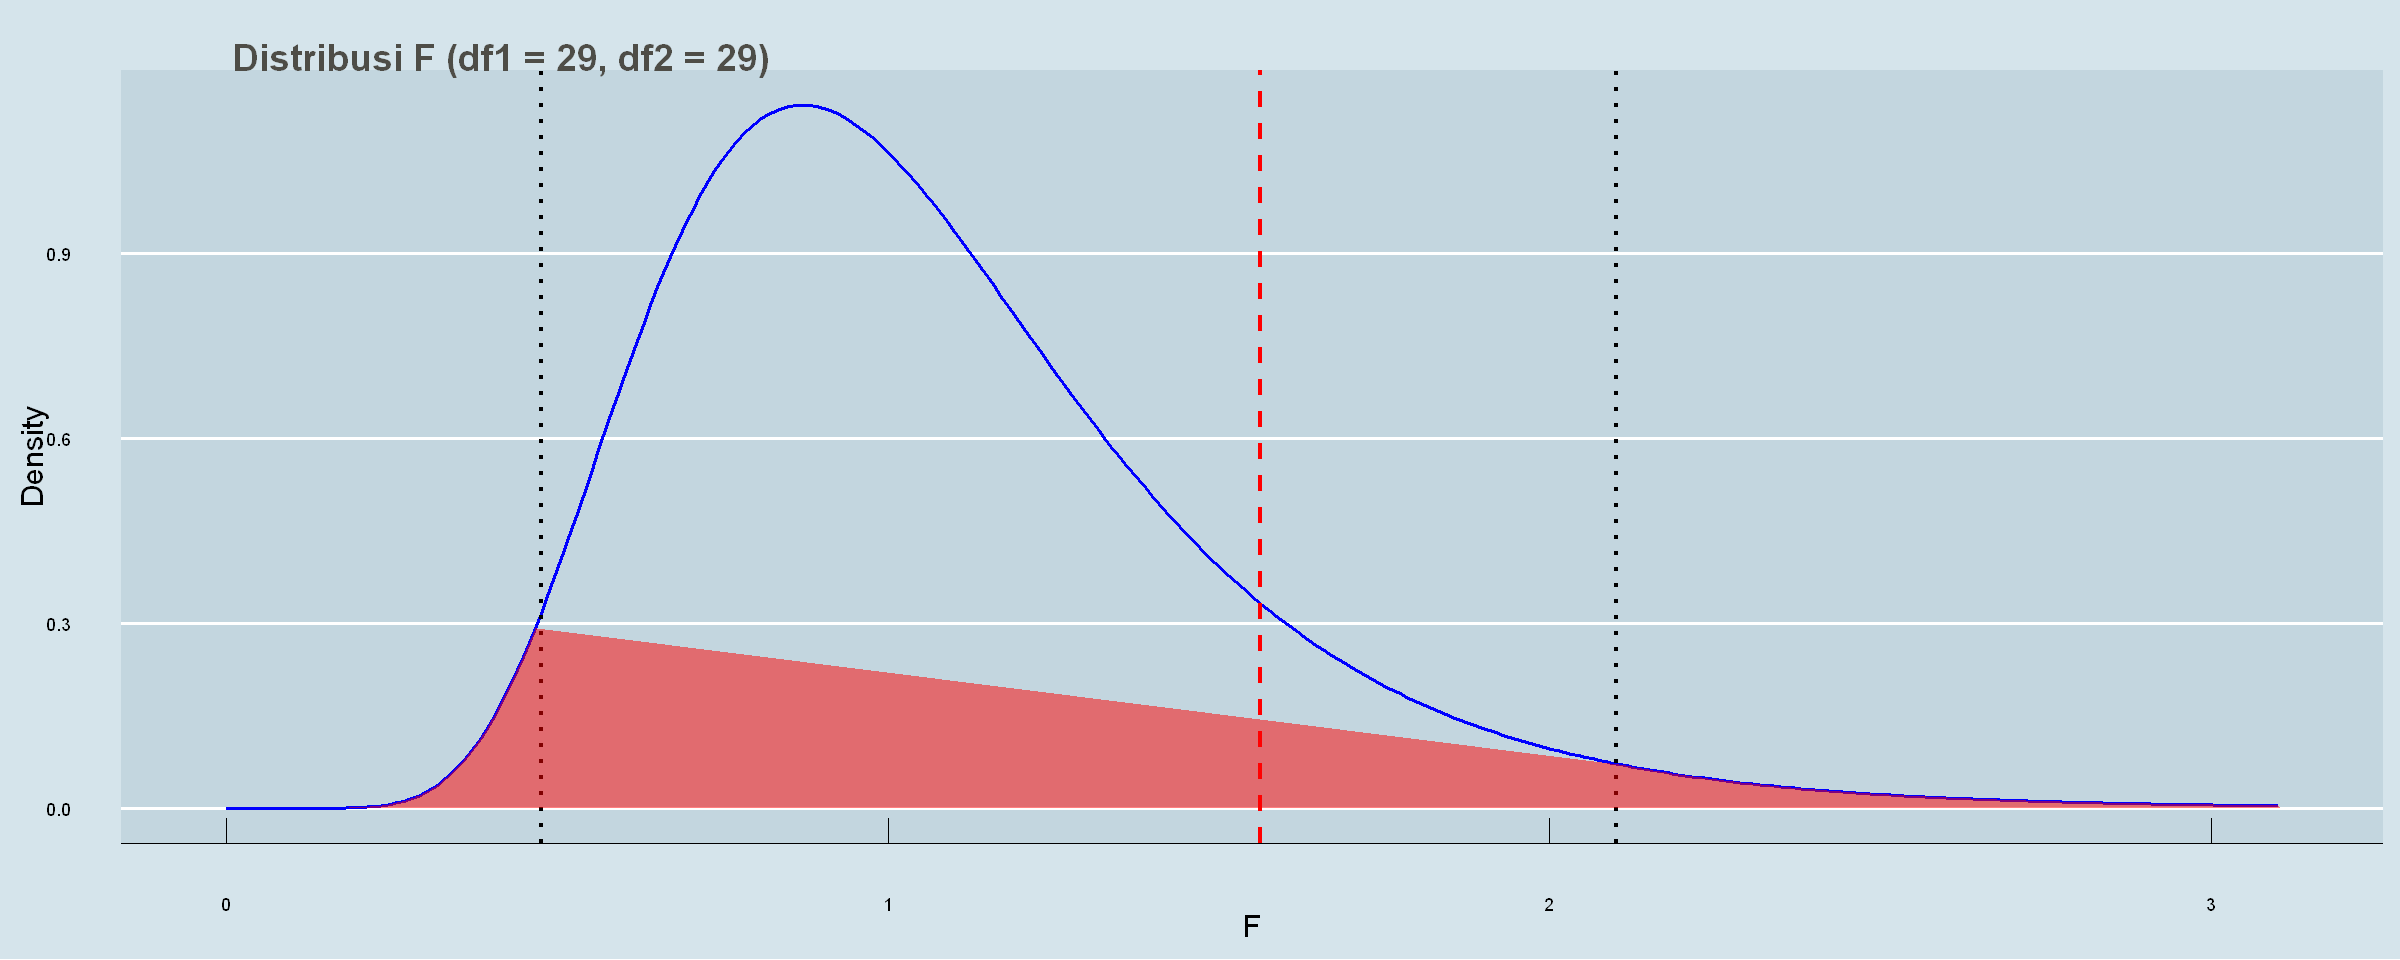

In [87]:
# Data untuk plot distribusi F
x_vals <- seq(0, F_kritis_atas + 1, length.out = 300)
y_vals <- df(x_vals, df1, df2)

df_plot <- data.frame(x = x_vals, y = y_vals)

ggplot(df_plot, aes(x, y)) +
  geom_line(color = "blue", size = 1) +
  geom_vline(xintercept = F_hitung, color = "red", linetype = "dashed", size = 1.2) +
  geom_vline(xintercept = F_kritis_bawah, color = "black", linetype = "dotted", size = 1.2) +
  geom_vline(xintercept = F_kritis_atas, color = "black", linetype = "dotted", size = 1.2) +
  geom_area(data = subset(df_plot, x <= F_kritis_bawah | x >= F_kritis_atas), 
            aes(x, y), fill = "red", alpha = 0.5) +
  labs(
    title = "Distribusi F (df1 = 29, df2 = 29)",
    x = "F",
    y = "Density"
  ) +
  theme_economist(base_size = 30, dkpanel=TRUE)+
 theme(legend.position = "none",  
        plot.title = element_text(size= 22, hjust=0.01, color = "#4e4d47", margin = margin(b = -0.1, t = 0.4, l = 2, unit = "cm")),
        axis.title.x = element_text(size = 18), # Perbesar teks sumbu X
        axis.title.y = element_text(size = 18)) # Perbesar teks sumbu Y)  